# Derived-Term Automata of Multitape Expressions with Composition

*This is still an early draft.  This page will be updated during May 2017.*

This page is a complement to the paper [Derived-Term Automata of Multitape Expressions with Composition](https://www.lrde.epita.fr/wiki/Publications/demaille.17.sacs).  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/SACS-2017.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/SACS-2017.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.

In [1]:
import vcsn
vcsn.table = vcsn.ipython.table

# Introduction: Motivating Examples
First we introduce the _context_ we are interested in: labels are letter-or-empty-word, two tapes, weights are in the tropical semiring $\mathbb{Z}_{\min} := \langle \mathbb{Z}, \min, +, \infty, 0 \rangle$.

In [2]:
zmin2 = vcsn.context('lat<lan, lan>, zmin')
zmin2

{...}? x {...}? -> Zmin

The following examples show how the multiplication and addition of $\mathbb{Z}_{\min}$ behave:

In [3]:
zmin2.weight('1') * zmin2.weight('3')

4

In [4]:
zmin2.weight('1') + zmin2.weight('3')

1

The first automaton, $\mathcal{A}$, is obtained from the following rational expression (the empty word is noted `\e` in Vcsn, and rendered $\varepsilon$ even as an expression, whereas in the paper it is written $\mathsf{1}$).

In [5]:
zmin2.expression(r'(a|a+b|b+⟨1⟩(\e|(a+b)+(a+b)|\e))∗')

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

Or, using syntactic sugar ($a := a|a$, $[ab] := a+b$):

In [6]:
e1 = zmin2.expression(r'([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗')
e1

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

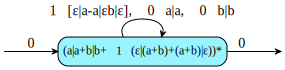

In [7]:
a1 = e1.derived_term()
a1

Ng's automaton is:

In [8]:
e2 = zmin2.expression('[ab]∗ (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗')
e2

(a|a+b|b)*(<2>(a|b+b|a)+<1>(\e|(a+b)+(a+b)|\e))*

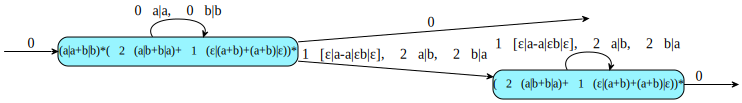

In [9]:
e2.derived_term()

Or, cleaned from state decorations:

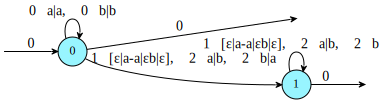

In [10]:
a2 = e2.automaton('expansion')
a2

Mohri factors his automaton $\mathcal{A}$ in the composition of $\mathcal{A}_1$ and $\mathcal{A}_2$:

In [11]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗')
f = f1.compose(f2)
vcsn.table([[f1, f1.derived_term()],
            [f2, f2.derived_term()],
            [f, f.derived_term()]])

"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+⟨1⟩(ε|i+(a+b)|s))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨1⟩[ε|ia|sb|s], ⟨0⟩a|a, ⟨0⟩b|b"
$\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+s|ε+i|(a+b))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨0⟩[a|ab|bi|ai|bs|ε]"
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}@\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+⟨1⟩(ε|i+(a+b)|s))*@(a|a+b|b+s|ε+i|(a+b))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨1⟩[ε|aε|ba|εb|ε], ⟨0⟩a|a, ⟨0⟩b|b"


The resulting automaton is exactly the automaton $\mathcal{A}$.

# Example $\mathsf{E}_1$: A Simple Multitape Expression
First we introduce the _context_ we are interested in: two tapes (`lat`) whose labels are letter-or-empty-word (`lan`), weights are rational numbers (`q`).

In [12]:
q2 = vcsn.context('lat<lan(abcde), lan(xy)>, q')
q2

{abcde}? x {xy}? -> Q

The expression $\mathsf{E}_1$ is:

In [13]:
e1 = q2.expression('⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy')
e1

<4>(ade*)|x+<3>(bde*)|x+<2>(ace*)|xy+<6>(bce*)|xy

Its expansion is (contrary to the paper, the empty expression is denoted $\varepsilon$ instead of $\mathsf{1}$):

In [14]:
e1.expansion()

a|x.[<2>ce*|y + <4>de*|\e] + b|x.[<6>ce*|y + <3>de*|\e]

The derived-term automaton of $\mathsf{E}_1$, $\mathcal{A}_{\mathsf{E}_1}$, is:

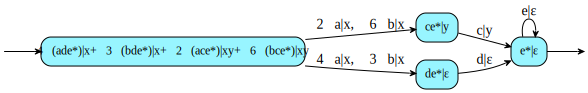

In [15]:
a1 = e1.derived_term()
a1

The 10 shortest "multitape words" it accepts are:

In [16]:
a1.shortest(10)

<2>ac|xy + <4>ad|x + <6>bc|xy + <3>bd|x + <2>ace|xy + <4>ade|x + <6>bce|xy + <3>bde|x + <2>acee|xy + <4>adee|x

# Example $\mathcal{A}_3$: An Exponential Number of States
We introduce a three-tape context.  The graphical rendering is less satisfying.

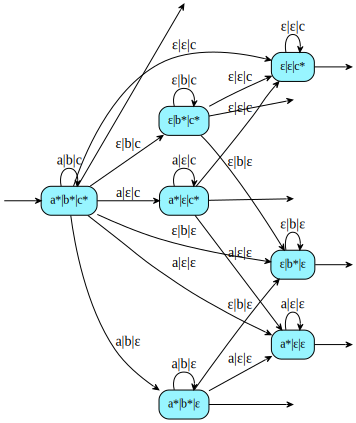

In [17]:
q3 = vcsn.context('lat<lan, lan, lan>, q')
a3 = q3.expression('a*|b*|c*').derived_term()
a3

From multitape automata currently Vcsn extracts only simple-tape expressions over multitape generators (e.g. $(\varepsilon | a)^*$) instead of general mutitape expressions (e.g. $\varepsilon | a^*$):

In [18]:
a3.expression()

(a|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*+(\e|b|c)(\e|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*)+(a|\e|c)(a|\e|c)*(\e+(\e|\e|c)(\e|\e|c)*+(a|\e|\e)(a|\e|\e)*)+(a|b|\e)(a|b|\e)*(\e+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*))

Instead of displaying the automaton, we may list its states, for instance in the case of a five-tape expression.

In [19]:
import re
def states(a):
    '''The states of an automaton, sorted.'''
    res = re.findall(r'label = "(.*?)", shape', a.dot(), re.M)
    res.sort()
    return res

q5 = vcsn.context('lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q')
e5 = q5.expression('a*|b*|c*|d*|e*')
e5

a*|b*|c*|d*|e*

In [20]:
e5.expansion()

<1> + \e|\e|\e|\e|e.[\e|\e|\e|\e|e*] + \e|\e|\e|d|\e.[\e|\e|\e|d*|\e] + \e|\e|\e|d|e.[\e|\e|\e|d*|e*] + \e|\e|c|\e|\e.[\e|\e|c*|\e|\e] + \e|\e|c|\e|e.[\e|\e|c*|\e|e*] + \e|\e|c|d|\e.[\e|\e|c*|d*|\e] + \e|\e|c|d|e.[\e|\e|c*|d*|e*] + \e|b|\e|\e|\e.[\e|b*|\e|\e|\e] + \e|b|\e|\e|e.[\e|b*|\e|\e|e*] + \e|b|\e|d|\e.[\e|b*|\e|d*|\e] + \e|b|\e|d|e.[\e|b*|\e|d*|e*] + \e|b|c|\e|\e.[\e|b*|c*|\e|\e] + \e|b|c|\e|e.[\e|b*|c*|\e|e*] + \e|b|c|d|\e.[\e|b*|c*|d*|\e] + \e|b|c|d|e.[\e|b*|c*|d*|e*] + a|\e|\e|\e|\e.[a*|\e|\e|\e|\e] + a|\e|\e|\e|e.[a*|\e|\e|\e|e*] + a|\e|\e|d|\e.[a*|\e|\e|d*|\e] + a|\e|\e|d|e.[a*|\e|\e|d*|e*] + a|\e|c|\e|\e.[a*|\e|c*|\e|\e] + a|\e|c|\e|e.[a*|\e|c*|\e|e*] + a|\e|c|d|\e.[a*|\e|c*|d*|\e] + a|\e|c|d|e.[a*|\e|c*|d*|e*] + a|b|\e|\e|\e.[a*|b*|\e|\e|\e] + a|b|\e|\e|e.[a*|b*|\e|\e|e*] + a|b|\e|d|\e.[a*|b*|\e|d*|\e] + a|b|\e|d|e.[a*|b*|\e|d*|e*] + a|b|c|\e|\e.[a*|b*|c*|\e|\e] + a|b|c|\e|e.[a*|b*|c*|\e|e*] + a|b|c|d|\e.[a*|b*|c*|d*|\e] + a|b|c|d|e.[a*|b*|c*|d*|e*]

In [21]:
a5 = e5.derived_term()
states(a5)

['a*|b*|c*|d*|e*',
 'a*|b*|c*|d*|ε',
 'a*|b*|c*|ε|e*',
 'a*|b*|c*|ε|ε',
 'a*|b*|ε|d*|e*',
 'a*|b*|ε|d*|ε',
 'a*|b*|ε|ε|e*',
 'a*|b*|ε|ε|ε',
 'a*|ε|c*|d*|e*',
 'a*|ε|c*|d*|ε',
 'a*|ε|c*|ε|e*',
 'a*|ε|c*|ε|ε',
 'a*|ε|ε|d*|e*',
 'a*|ε|ε|d*|ε',
 'a*|ε|ε|ε|e*',
 'a*|ε|ε|ε|ε',
 'ε|b*|c*|d*|e*',
 'ε|b*|c*|d*|ε',
 'ε|b*|c*|ε|e*',
 'ε|b*|c*|ε|ε',
 'ε|b*|ε|d*|e*',
 'ε|b*|ε|d*|ε',
 'ε|b*|ε|ε|e*',
 'ε|b*|ε|ε|ε',
 'ε|ε|c*|d*|e*',
 'ε|ε|c*|d*|ε',
 'ε|ε|c*|ε|e*',
 'ε|ε|c*|ε|ε',
 'ε|ε|ε|d*|e*',
 'ε|ε|ε|d*|ε',
 'ε|ε|ε|ε|e*']

## Example $\mathsf{E}_2$: A Sed-like Substitution

In [22]:
e2 = q2.expression('(a{+}|x + b{+}|y)*')
e2

(aa*|x+bb*|y)*

In [23]:
e2.expansion()

<1> + a|x.[(a*|\e)(aa*|x+bb*|y)*] + b|y.[(b*|\e)(aa*|x+bb*|y)*]

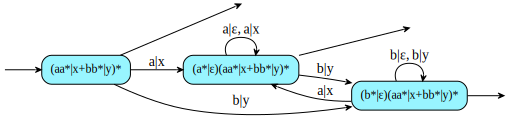

In [24]:
a2 = e2.derived_term()
a2

Again, the extracted expression is less readable.

In [25]:
a2.expression()

\e+(a|x)(a|\e+a|x)*+(b|y+(a|x)(a|\e+a|x)*(b|y))(b|\e+b|y+(a|x)(a|\e+a|x)*(b|y))*(\e+(a|x)(a|\e+a|x)*)

## A More Complex Expression
The previous examples often look like sed-like substitutions, in the sense that the first tape was often a composite expression, but the second tape a simple label.  There is no such limitation.

In [26]:
e = q2.expression('(<2>[ab])* | (<3>[xy])*')
e

(<2>(a+b))*|(<3>(x+y))*

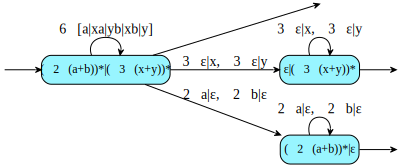

In [27]:
a = e.derived_term()
a

In [28]:
print('{:l}'.format(a.shortest(20)))

\e|\e
<3>\e|x
<3>\e|y
<2>a|\e
<6>a|x
<6>a|y
<2>b|\e
<6>b|x
<6>b|y
<9>\e|xx
<9>\e|xy
<9>\e|yx
<9>\e|yy
<18>a|xx
<18>a|xy
<18>a|yx
<18>a|yy
<18>b|xx
<18>b|xy
<18>b|yx


## Section 5.3: Derived-Term Automaton with Composition

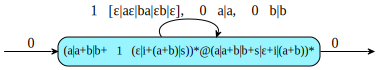

In [29]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗')
f = f1.compose(f2) # f1 @ f2 with Python 3.5+.
f.derived_term()

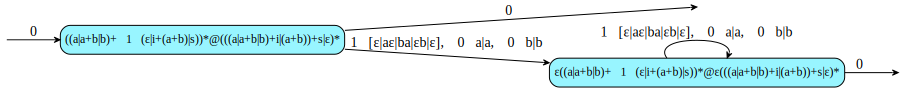

In [30]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗', 'none')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗', 'none')
f = f1.compose(f2)
f.derived_term()

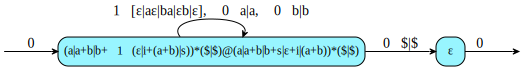

In [31]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗($|$)')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗($|$)')
f = f1.compose(f2) # f1 @ f2 with Python 3.5+.
f.derived_term()

### Example 6
In the Example 6 we used symbolic weights, $k, h$.  In order to simulate this, we introduce expressions whose weights are expressions (whose weights are in $\mathbb{Q}$):

In [32]:
import vcsn
from IPython.display import display
eset2 = vcsn.context('lat<lan(ab), lan(ab)>, expressionset<lan(kh), q>')
eset2

{ab}? x {ab}? -> RatE[{hk}? -> Q]

Then we build and display the expression, its expansion, and its derived-term automaton.

(<k>\e|a)*@(<h>aa|\e)*

<\e> + \e|\e.[<kh>(<k>\e|a)*@(a|\e)(<h>aa|\e)*]

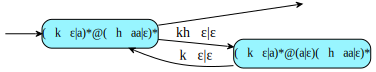

In [33]:
e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'trivial')
display(e)
display(e.expansion())
display(e.derived_term())

(<k>\e|a)*@(<h>aa|\e)*

<\e> + \e|\e.[<k>(\e|a)(<k>\e|a)*@\e + <h>\e@(a|\e)((a|\e)(<h>aa|\e)*) + <kh>(<k>\e|a)*@(a|\e)(<h>aa|\e)*]

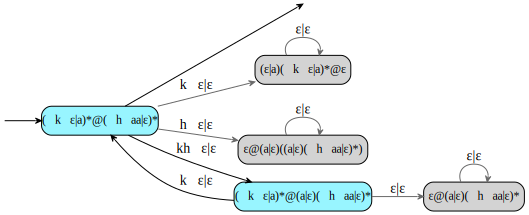

In [34]:
vcsn.setenv(OLDWAY=0, DENORM=1)
e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'trivial')
display(e)
display(e.expansion())
display(e.derived_term())

(<k>\e|a)*@(<h>aa|\e)*

<\e> + \e|\e.[<k>(\e|a)(<k>\e|a)*@\e + <h>\e@(a|\e){2}(<h>aa|\e)* + <kh>(<k>\e|a)*@(a|\e)(<h>aa|\e)*]

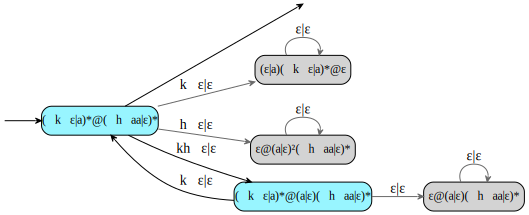

In [35]:
vcsn.setenv(OLDWAY=0, DENORM=1)
e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'agressive')
display(e)
display(e.expansion())
display(e.derived_term())

## Section 6.1: Discussion on the Validity of Automata

In [36]:
import vcsn
def compare(e, name=None, ctx='lan, q'):
    if not isinstance(e, vcsn.context):
        e = vcsn.context(ctx).expression(e, identities='trivial')
    if name:
        e_named = e.name(name)
    else:
        e_named = e
    a_norm = e_named.derived_term()
    vcsn.setenv(NAIVE_MUL=1, NAIVE_STAR=1)
    a_denorm = e_named.derived_term()
    vcsn.setenv(NAIVE_MUL=0, NAIVE_STAR=0)
    return vcsn.table([['Expression', 'Denormalized', 'Normal'], [e, a_denorm, a_norm]])
compare('a*b*c*')

[['Expression', 'Denormalized', 'Normal'],
 [a*(b*c*),
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>,
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>]]

In [37]:
compare('(<1/2>\e)*')

Expression,Denormalized,Normal
"$\left( \left\langle \frac{1}{2} \right\rangle \,\varepsilon\right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (⟨1/2⟩ε)* <!-- I0->0 --> I0->0 <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 <!-- 0->0 --> 0->0 ⟨1/2⟩ε","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (⟨1/2⟩ε)* <!-- I0->0 --> I0->0 <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨2⟩"


In [38]:
compare('(a*b* + <-1>\e)*', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [(a*b*+<-1>\e)*,
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>,
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>]]

In [39]:
compare('((<1/2>\e)* + <-2>\e)*', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [((<1/2>\e)*+<-2>\e)*,
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>,
  expression_automaton<mutable_automaton<context<nullableset<letterset<char_letters>>, q>>>]]

In [40]:
compare('((\e|ab @ ab|\e) + <-1>\e)*', ctx='lat<lan, lan>, q', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [(\e|ab@ab|\e+<-1>\e)*,
  expression_automaton<mutable_automaton<context<lat<nullableset<letterset<char_letters>>, nullableset<letterset<char_letters>>>, q>>>,
  expression_automaton<mutable_automaton<context<lat<nullableset<letterset<char_letters>>, nullableset<letterset<char_letters>>>, q>>>]]

## Section 6.2: Discussion on Identities

In [41]:
from IPython.display import display
import vcsn
zmin2 = vcsn.context('lat<lan, lan>, zmin')

#e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'trivial')
#e = eset2.expression('(\e|a)∗ @ (aa|\e)∗', 'trivial')

#e = eset2.expression('(\e|a?) @ (a|\e)', 'trivial')

e1 = zmin2.expression('(a|<2>x?)', 'trivial')
e2 = zmin2.expression('(x|b)', 'trivial')

#e1 = zmin2.expression('\e|\e', 'essential')
#e2 = zmin2.expression('a|b', 'essential')

e = e1.compose(e2)
x1 = e1.expansion()
x2 = e2.expansion()

display(e)
display(x1)
display(x2)

a|<2>(\e+x)@x|b

a|\e.[<2>\e] + a|x.[<2>\e]

x|b.[<0>\e]

In [42]:
vcsn.setenv(OLDWAY=0, DENORM=0, CREDIT=5)
x1.compose(x2)

a|b.[<2>\e + <2>\e@x|\e]

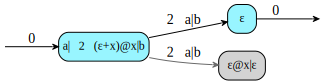

In [43]:
e.derived_term()

In [44]:
vcsn.setenv(OLDWAY=0, DENORM=1, CREDIT=5)
x1.compose(x2)

a|b.[<2>\e + <2>\e@x|\e]

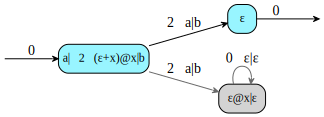

In [45]:
e.derived_term(lazy=True).accessible()

In [46]:
vcsn.setenv(OLDWAY=1)
x1.compose(x2)

a|\e.[<2>\e@x|b] + a|b.[<2>\e]

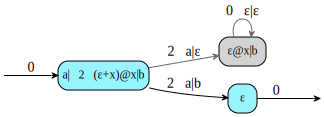

In [47]:
e.derived_term(lazy=True).accessible()

a|\e.[<2>\e@x|b] + a|b.[<2>\e]

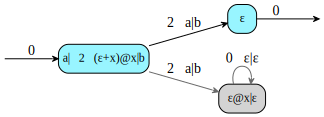

In [48]:
display(e.expansion())
vcsn.setenv(CREDIT=6, OLDWAY=0)
a = e.derived_term(lazy=True)
a.accessible()

In [49]:
x = vcsn.context('lan, b').expression(r'\e', 'none').expansion()
display(x)
x2 = x | x
x2

<1>

<1>

In [50]:
x2.compose(x2)

\e|\e.[\e@\e]

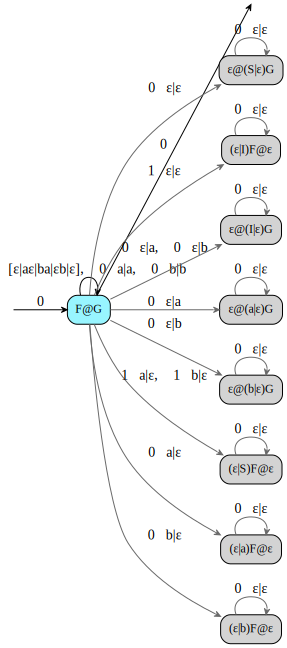

In [51]:
import vcsn
f = zmin2.expression('([ab] + ⟨1⟩(\e|I + [ab]|S))∗').name('F')
g = zmin2.expression('([ab] + I|[ab] + S|\e)∗').name('G')
e = f.compose(g)
e.derived_term()

## Size of the result

In [52]:
import vcsn
zmin2 = vcsn.context('lat<lan, lan>, zmin')

from vcsn.tools import _timeit
def timeit(fun):
    '''Run `fun` a number of times, and return its fastest run in milliseconds.'''
    return '{}ms'.format(round(_timeit(lambda: fun())[1]))

title = ["Expression", 'Derived-term: states', 'Inductive: states', 'DT: duration', 'Ind: duration']

def compare(e):
    # Make sure this is an object expression, not just a string.
    if not isinstance(e, vcsn.expression):
        e = zmin2.expression(e)
    # Compute its derived-term automaton.
    a1 = e.automaton('expansion')
    t1 = timeit(lambda: e.automaton('expansion'))
    # Compute another automaton by mapping operators to one of their natural implementation.
    # In the case of single-tape automata, this yield the standard (aka Glushkov) automaton.
    a2 = e.automaton('inductive')
    t2 = timeit(lambda: e.automaton('inductive'))
    # Return their numbers of states.
    return [e, a1.state_number(), a2.state_number(), t1, t2]

In [53]:
# ignore: \d+ms
vcsn.setenv(DENORM=1, CREDIT=6)
compare('a|a + b|b')

[a|a+b|b, 2, 3, '18ms', '11ms']

In [54]:
# ignore: \d+ms
compare('(<0>(a|a + b|b))*')

[(a|a+b|b)*, 1, 3, '19ms', '16ms']

In [55]:
# ignore: \d+ms
compare('(<0>[ab] + <1>([ab]|\e + \e|[ab]))*')

[(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*, 1, 7, '57ms', '79ms']

In [56]:
zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
zmin2
e = zmin2.expression('([ab] + <1>(\e|I+[ab]|S))* @ ([ab] + I|[ab] + S|[ab]?)*')
e.expansion()

<0> + \e|\e.[<1>(\e|I)(a|a+b|b+<1>(\e|I+(a+b)|S))*@\e + <0>\e@(S|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + \e|a.[<0>\e@(I|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <0>\e@(S|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <0>\e@(a|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + \e|b.[<0>\e@(I|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <0>\e@(S|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <0>\e@(b|\e)(a|a+b|b+I|(a+b)+S|(\e+a+b))* + <1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + a|\e.[<1>(\e|S)(a|a+b|b+<1>(\e|I+(a+b)|S))*@\e + <0>(\e|a)(a|a+b|b+<1>(\e|I+(a+b)|S))*@\e + <1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + a|a.[<0>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + a|b.[<1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + b|\e.[<1>(\e|S)(a|a+b|b+<1>(\e|I+(a+b)|S))*@\e + <0>(\e|b)(a|a+b|b+<1>(\e|I+(a+b)|S))*@\e + <1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*] + b|a.[<1>(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a

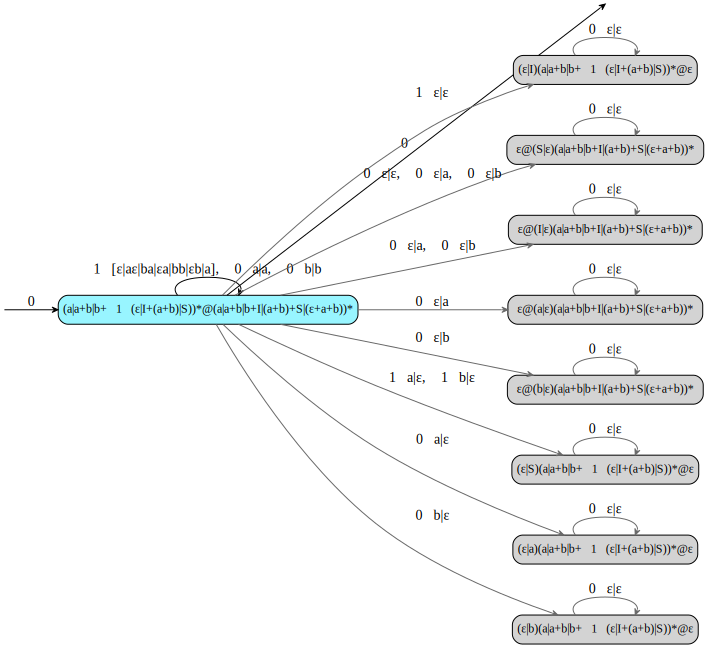

In [57]:
vcsn.setenv(CREDIT=10, DENORM=1)
a = e.derived_term()
a

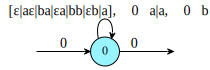

In [58]:
a.strip().trim()

In [59]:
# ignore: \d+ms
zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
zmin2
compare('([ab] + <1>(\e|I+[ab]|S))* @ ([ab] + I|[ab] + S|[ab]?)*')

[(a|a+b|b+<1>(\e|I+(a+b)|S))*@(a|a+b|b+I|(a+b)+S|(\e+a+b))*,
 1,
 11,
 '255ms',
 '293ms']

In [60]:
# ignore: \d+ms
compare('(a{+}|x + b{+}|y)*')

[(aa*|x+bb*|y)*, 3, 5, '149ms', '57ms']

In [61]:
# ignore cell
from IPython.display import display
res = [title]
for i in range(10):
    e = zmin2.random_expression('+, ., *=.2, w., .w, w="min=0, max=3", |=.5, @', length=20)
    c = compare(e)
    # print(c)
    res.append(c)
vcsn.table(res)

Expression,Derived-term: states,Inductive: states,DT: duration,Ind: duration
"$ \left\langle 3 \right\rangle \,\left(\left(I|S\right) \, \left(\varepsilon|a\right)\right)@ \left\langle 2 \right\rangle \,\varepsilon + \left\langle 1 \right\rangle \,\left(\left(\varepsilon|S + b|S\right)@ \left\langle 1 \right\rangle \,\left(\varepsilon + x|\varepsilon\right)\right)$",0,1,30ms,67ms
"$ \left\langle 3 \right\rangle \,\left(\varepsilon|a\right)@ \left\langle 3 \right\rangle \,\left(\left(S|S\right) \, \left(\varepsilon + \left\langle 3 \right\rangle \,\left(y|\varepsilon\right)\right)\right)^{*}$",0,1,18ms,46ms
"$\varepsilon|y@ \left. b \, S \middle| \left\langle 1 \right\rangle \,x \right. @ \left\langle 3 \right\rangle \,\left(\left(\varepsilon|b\right) \, \left(\varepsilon|a\right)\right)@a|I$",0,1,27ms,71ms
"$ \left\langle 3 \right\rangle \,\left(S|S@\varepsilon@\left(\varepsilon|b + I|\varepsilon\right) \, \left( \left. \left\langle 3 \right\rangle \,a \middle| \left\langle 1 \right\rangle \,\varepsilon \right. \right)\right)$",0,1,17ms,59ms
"$\left( \left\langle 3 \right\rangle \,\left(\left(\varepsilon|y\right) \, \left(\varepsilon|b@ \left. S \middle| \left\langle 1 \right\rangle \,\varepsilon \right. \right)\right)\right)^{*}$",1,2,30ms,35ms
"$\left(\varepsilon|a + \left(\varepsilon|x\right) \, \left(\varepsilon|I\right) + \left\langle 1 \right\rangle \,\left(\varepsilon + \varepsilon|x + b|\varepsilon\right)\right)@ \left\langle 2 \right\rangle \,\left(x|x\right)$",2,4,28ms,73ms
$\emptyset$,0,1,11ms,2ms
"$ \left\langle 1 \right\rangle \,\left(\left(b|\varepsilon\right) \, \left( \left\langle 2 \right\rangle \,\left(\varepsilon|x\right) + y|\varepsilon\right)@x|I\right)@\left(x|I + \left\langle 9 \right\rangle \,\left(x|x\right)\right)$",0,3,18ms,71ms
"$ \left. \left( \left\langle 3 \right\rangle \,x\right)^{*} \middle| \left\langle 8 \right\rangle \,\left(S \, I\right) \right. $",5,6,77ms,28ms
$\emptyset$,0,1,10ms,2ms


In [62]:
# ignore: \d+ms
res = [title]
for i in range(20):
    e = zmin2.expression('[ab]*  (a|b){{{}}}  [ab]*'.format(i))
    res.append(compare(e))
vcsn.table(res)

Expression,Derived-term: states,Inductive: states,DT: duration,Ind: duration
${\left(a|a + b|b\right)^{*}}^{2}$,2,5,36ms,43ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right) \, \left(a|a + b|b\right)^{*}$",2,6,30ms,53ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{2} \, \left(a|a + b|b\right)^{*}$",3,7,36ms,63ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{3} \, \left(a|a + b|b\right)^{*}$",4,8,41ms,78ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{4} \, \left(a|a + b|b\right)^{*}$",5,9,44ms,90ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{5} \, \left(a|a + b|b\right)^{*}$",6,10,48ms,101ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{6} \, \left(a|a + b|b\right)^{*}$",7,11,54ms,118ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{7} \, \left(a|a + b|b\right)^{*}$",8,12,58ms,131ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{8} \, \left(a|a + b|b\right)^{*}$",9,13,62ms,145ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{9} \, \left(a|a + b|b\right)^{*}$",10,14,65ms,165ms


## Section 6.6: Discussion on the Performances
In this section, we compare the size of automata generated either using the "standard automaton" construction (aka, Glushkov automata), or the expansion-based derived-term automaton as exposed in the paper.

In [63]:
def exp(e, ctx=None):
    '''Make an expression from `e`, using the context `ctx`
    if `e` is not already an expression.'''
    if isinstance(e, vcsn.expression):
        return e
    else:
        if not isinstance(ctx, vcsn.context):
            ctx = vcsn.context(ctx)
        return ctx.expression(e)

def compare_one(e):
    '''Compare the sizes of the derived-term, denormalized derived-term, and inductive
    automata from exprssion `e`.'''
    e = exp(e, ctx=zmin2)
    ind = e.inductive()
    dte = e.derived_term()
    vcsn.setenv(OLDWAY=1, DENORM=1)
    den = e.derived_term()
    vcsn.setenv(OLDWAY=0, DENORM=0)
    return [e, 
            dte.info('number of states'), dte.info('number of transitions'),
            den.info('number of states'), den.info('number of transitions'),
            ind.info('number of states'), ind.info('number of transitions')]

def compare(*es):
    '''Compare the sizes of the derived-term, denormalized derived-term, and inductive
    automata for each expression in `es`.'''
    res = [['Expression',
            'DTerm states', 'Dterm transitions',
            'Denorm DTerm states', 'Denorm Dterm transitions',
            'Inductive states', 'Inductive transitions']]
    for e in es:
        res.append(compare_one(e))
    return res

zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
eset2 = vcsn.context('lat<lan, lan>, expressionset<lan, q>')
q = vcsn.context('lan, q')
q3 = vcsn.context('lat<lan, lan, lan>, q')

res = compare(# Introduction
              exp('([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗', zmin2),
              exp('[ab]∗  (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗', zmin2),
              exp('([ab] + ⟨1⟩(\e|I + [ab]|S))∗', zmin2),
              exp('([ab] + I|[ab] + S|\e)∗', zmin2),
              exp('(([ab] + ⟨1⟩(\e|I + [ab]|S))∗)  @  (([ab] + I|[ab] + S|\e)∗)', zmin2),
              exp('⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy', zmin2),
              exp('a + ⟨2⟩bc∗', ctx=zmin), # Section 3.
              exp('a*|b*|c*', ctx=q3), # Example 4.
              exp('a*|b*|c*|d*|e*', ctx='lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q'), # Example 4
              exp('(a{+}|x + b{+}|y)*', zmin2),  # Example 5
              exp('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', ctx=eset2), # Example 8, Section 5.3,
              exp('a*b*c*', ctx=q), # Section 6.1
              exp('(<1/2>\\e)*', ctx=q), # Section 6.1
              exp('(a*b* + <-1>\\e)*', ctx=q), # Section 6.1
              exp('((<1/2>\\e)* + <-2>\\e)*', ctx=q), # Section 6.1
#              exp('((\\e|ab @ ab|\\e) + <-1>\\e)*', ctx='lat<lan, lan>, q'), # Section 6.1, invalid automaton.
             )
t = vcsn.table(res)
t

Expression,DTerm states,Dterm transitions,Denorm DTerm states,Denorm Dterm transitions,Inductive states,Inductive transitions
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",1,6,1,6,7,42
"$\left(a|a + b|b\right)^{*} \, \left( \left\langle 2 \right\rangle \,\left(a|b + b|a\right) + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",2,14,2,14,9,60
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|I + \left. \left(a + b\right) \middle| S \right. \right)\right)^{*}$",1,5,1,5,6,30
$\left(S|\varepsilon + a|a + b|b + \left. I \middle| \left(a + b\right) \right. \right)^{*}$,1,5,1,5,6,30
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|I + \left. \left(a + b\right) \middle| S \right. \right)\right)^{*}@\left(S|\varepsilon + a|a + b|b + \left. I \middle| \left(a + b\right) \right. \right)^{*}$",1,6,11,26,7,42
"$ \left. \left\langle 4 \right\rangle \,\left(a \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 3 \right\rangle \,\left(b \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 2 \right\rangle \,\left(a \, c \, {e}^{*}\right) \middle| x \, y \right. + \left. \left\langle 6 \right\rangle \,\left(b \, c \, {e}^{*}\right) \middle| x \, y \right. $",4,7,4,7,13,16
"$a + \left\langle 2 \right\rangle \,\left(b \, {c}^{*}\right)$",3,3,3,3,4,4
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \right. $,7,19,7,19,8,26
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \middle| {d}^{*} \middle| {e}^{*} \right. $,31,211,31,211,32,242
"$\left( \left. a \, {a}^{*} \middle| x \right. + \left. b \, {b}^{*} \middle| y \right. \right)^{*}$",3,8,3,8,5,14
